In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("data_segunda-medicion.csv")

In [3]:
# Definimos las listas con V1 (Volumen de HCl para que el NaOH con fenolftaleína pase de rosa a transparente)\n",
V1_1 = np.array(data["#1"])[::2]
V1_2 = np.array(data["#2"])[::2]
V1_3 = np.array(data["#3"])[::2]
V1_4 = np.array(data["#4"])[::2]
                       
# Definimos las listas con V2 (Volumen agregado de HCl para que el NaOH con fenolftaleína y naranja de metilo pase de naranja a rojo)\n",
V2_1 = np.array(data["#1"])[1::2]
V2_2 = np.array(data["#2"])[1::2]
V2_3 = np.array(data["#3"])[1::2]
V2_4 = np.array(data["#4"])[1::2]

In [4]:
# Calculamos las diferencias de volumen que representan al CO2 atrapado en el NaOH\n",
DV_1 = V2_1 - V1_1 
DV_2 = V2_2 - V1_2
DV_3 = V2_3 - V1_3
DV_4 = V2_4 - V1_4

In [5]:
#agrego un 0 como primer valor
DV_1 = np.insert(DV_1, 0, 0., axis=0)
DV_2 = np.insert(DV_2, 0, 0., axis=0)
DV_3 = np.insert(DV_3, 0, 0., axis=0)
DV_4 = np.insert(DV_4, 0, 0., axis=0)

In [6]:
A=np.zeros(13)

In [7]:
#CAMBIAMOS EL NAOH; LE ADICIONAMOS A LAS NUEVAS MEDICIONES LA ÚLTIMA MEDICIÓN

DV_1 = DV_1+np.append(A,np.ones(len(DV_1[13:]))*DV_1[12])
DV_2 = DV_2+np.append(A,np.ones(len(DV_2[13:]))*DV_2[12])
DV_3 = DV_3+np.append(A,np.ones(len(DV_3[13:]))*DV_3[12])
DV_4 = DV_4+np.append(A,np.ones(len(DV_4[13:]))*DV_4[12])

In [8]:
#Los días, salteando los días que no vamos (domingos)
x=np.array([0,1,3,4,5,6,7,8,10,11,12,13,14,15,17])

#### Pasamos a gramos

### $g= V \frac{C_{HCl} V_{NaOH}}{V_{muestra}} 44 g/mol$


$\sigma_g ^2= (\frac{C_{HCl} V_{NaOH}}{V_{muestra}} 44 *\sigma_V)^2 + (V\frac{V_{NaOH}}{V_{muestra}}44*\sigma_C)^2 + (V\frac{C_{HCl}}{V_{muestra}} 44 * \sigma_{VNaOH})^2 + (V\frac{C_{HCl} V_{NaOH}}{V_{muestra}^2} 44 * \sigma_V)^2$

con $\sigma_V=0.1$ la mínima división de la pipeta,

$\sigma_{VNaOH}$ sería del recipiente con la rayita

y $\sigma_C$ proviene de cómo calculamos HCl:

Usamos el biftalato para saber la concentración de los NaOH. Luego, usamos un NaOH para valuar el HCl, con $C_{HCl} =  \frac{V_{NaOH}C_{NaOH}}{V_{HCl}}$ , entonces

$\sigma_C ^2 = (\frac{C_{NaOH}}{V_{HCl}}*\sigma_{V})^2 + (\frac{V_{NaOH}C_{NaOH}}{V_{HCl}^2}*\sigma_{V})^2 + (\frac{V_{NaOH}}{V_{HCl}}*\sigma_{CNAOH})^2$

y el error de $C_{NaOH}$ proviene de otra graduación: $C_{NaOH} = \frac{V_{Bift}C_{Bift}}{V_{NaOH}}$ donde también se propaga errores, y se asume que $C_{Bift}$ no tiene error

In [9]:
def gramos(x):#meter el volumen de la diferencia
    return x*0.5*0.5*44*24/(5*22)

In [10]:
#INCERTEZAS
sigma_C_NaOH=((0.1*0.05/1)**2 + (0.1*10*0.05/(1**2))**2)**0.5

sigma_C_HCl= ( (5/10*sigma_C_NaOH)**2 + (0.1*0.05/10)**2 + (5*0.1*0.05/100)**2   )**0.5

def error_g(V):
    A=0.5*0.5*44/5
    B=V*0.5*44/5
    C=V*0.5*44/5
    D=V*0.5*0.5*44/25
    
    sigma_V_NaOH=0 #en L, sería tipo 500 mas menos 1mL
    
    return ( (A*0.05)**2 + (B*sigma_C_HCl)**2  + (C*0.001)**2 + (D*0.1)**2 )**0.5

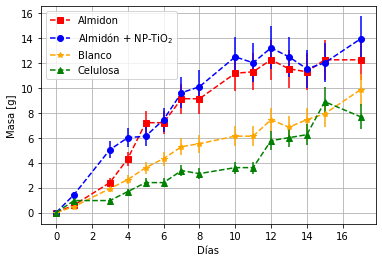

In [11]:
plt.plot(x,gramos(DV_1),'s--',label='Almidon',zorder=4,color='red')
plt.plot(x,gramos(DV_3),'o--',label='Almidón + NP-TiO$_2$',zorder=4,color='blue')
plt.plot(x,gramos(DV_4),'*--',label='Blanco',zorder=4,color='orange')
plt.plot(x,gramos(DV_2),'^--',label='Celulosa',zorder=4,color='green')

plt.errorbar(x, gramos(DV_1), yerr=error_g(gramos(DV_1)*24/22), fmt='.',color='red')
plt.errorbar(x, gramos(DV_3), yerr=error_g(gramos(DV_3)*24/22), fmt='.',color='blue')
plt.errorbar(x, gramos(DV_4), yerr=error_g(gramos(DV_4)*24/22), fmt='.',color='orange')
plt.errorbar(x, gramos(DV_2), yerr=error_g(gramos(DV_2)*24/22), fmt='.',color='green')

plt.legend()
plt.grid(True)
plt.xticks(np.arange(0,17,2))

#plt.title('Evolución del CO2 - Acumulado')
plt.xlabel('Días')
plt.ylabel('Masa [g]')
plt.savefig('titulacion-segunda_medicion.png')
plt.show()

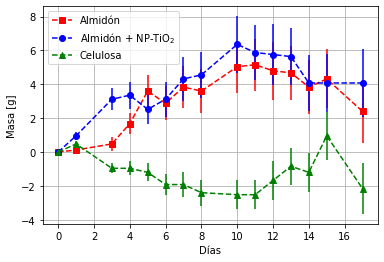

In [15]:
error_resta_1=(error_g(gramos(DV_1))**2 + error_g(gramos(DV_4))**2)**0.5
error_resta_2=(error_g(gramos(DV_2))**2 + error_g(gramos(DV_4))**2)**0.5
error_resta_3=(error_g(gramos(DV_3))**2 + error_g(gramos(DV_4))**2)**0.5

#plt.title('CO2 RESTADO EL BLANCO')
plt.plot(x,(gramos(DV_1)-gramos(DV_4)),'s--',label='Almidón',zorder=3,color='red')
plt.plot(x,(gramos(DV_3)-gramos(DV_4)),'o--',label='Almidón + NP-TiO$_2$',zorder=3,color='blue')
plt.plot(x,(gramos(DV_2)-gramos(DV_4)),'^--',label='Celulosa',zorder=3,color='green')
plt.errorbar(x,(gramos(DV_1)-gramos(DV_4)), yerr=error_resta_1, fmt='.',color='red')
plt.errorbar(x,(gramos(DV_3)-gramos(DV_4)), yerr=error_resta_3, fmt='.',color='blue')
plt.errorbar(x,(gramos(DV_2)-gramos(DV_4)), yerr=error_resta_2, fmt='.',color='green')
plt.legend()
plt.legend()

plt.xticks(np.arange(0,17,2))

plt.grid(True)
plt.xlabel('Días')
plt.ylabel('Masa [g]')
plt.savefig('segunda_medicion_restado.png')
plt.show()

# Chanteando

Como en el día 3 falló, le sumo el valor del compost en tal día para 'levantar' un poco la curva

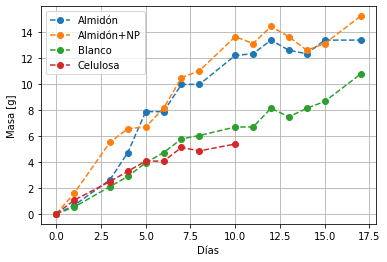

In [13]:
plt.plot(x,gramos(DV_1)*24/22,'o--',label='Almidón')
plt.plot(x,gramos(DV_3)*24/22,'o--',label='Almidón+NP')
plt.plot(x,gramos(DV_4)*24/22,'o--',label='Blanco')
plt.plot(x[0:9],(gramos(DV_2)[0:9] +np.array([0,0,1.32,1.32,1.32,1.32,1.32,1.32,1.32]))*24/22,'o--',label='Celulosa')
plt.legend()
plt.grid(True)
plt.xlabel('Días')
plt.ylabel('Masa [g]')
plt.savefig('titulacion-segunda_medicion_CHANTA.png')
plt.show()

Así y todo no funcionó, se plancha después igual